<a href="https://colab.research.google.com/github/kashish2610/Market-Campagian/blob/main/Market_campign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE  # for handling class imbalance

# Feature Engg

In [ ]:
df = pd.read_csv("/content/superstore_data.csv")
df.head(5)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.drop(['Id', 'Dt_Customer'], axis=1, inplace=True)

In [ ]:
from datetime import datetime

current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

In [ ]:
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1970,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,189,218,1,4,4,6,1,1,0,55
1,1961,Graduation,Single,57091.0,0,0,0,464,5,64,...,0,37,1,7,3,7,5,1,0,64
2,1958,Graduation,Married,67267.0,0,1,0,134,11,59,...,2,30,1,3,2,5,2,0,0,67
3,1967,Graduation,Together,32474.0,1,1,0,10,0,1,...,0,0,1,1,0,2,7,0,0,58
4,1989,Graduation,Single,21474.0,1,0,0,6,16,24,...,0,34,2,3,1,2,7,1,0,36


In [ ]:
df.drop( 'Year_Birth', axis=1, inplace=True)


In [ ]:
df.isnull().mean()

,0
Education,0.000000
Marital_Status,0.000000
Income,0.010714
Kidhome,0.000000
Teenhome,0.000000
Recency,0.000000
MntWines,0.000000
MntFruits,0.000000
MntMeatProducts,0.000000
MntFishProducts,0.000000


In [ ]:
#handling missing data
df = df.dropna()

In [ ]:
#reducing features
df['Family_Size'] = df['Kidhome'] + df['Teenhome']
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Recency              2216 non-null   int64  
 4   MntWines             2216 non-null   int64  
 5   MntFruits            2216 non-null   int64  
 6   MntMeatProducts      2216 non-null   int64  
 7   MntFishProducts      2216 non-null   int64  
 8   MntSweetProducts     2216 non-null   int64  
 9   MntGoldProds         2216 non-null   int64  
 10  NumDealsPurchases    2216 non-null   int64  
 11  NumWebPurchases      2216 non-null   int64  
 12  NumCatalogPurchases  2216 non-null   int64  
 13  NumStorePurchases    2216 non-null   int64  
 14  NumWebVisitsMonth    2216 non-null   int64  
 15  Response             2216 non-null   int64 

In [ ]:
df.shape

(2216, 19)

## Performing **EDA**

### Bar chart

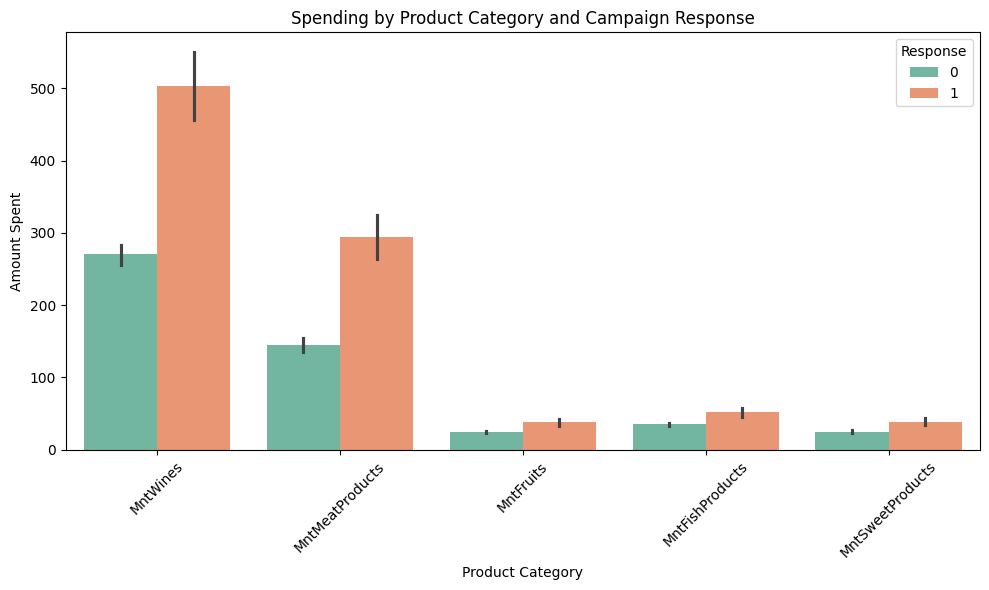

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Melt spending columns into long format
spending_cols = ['MntWines', 'MntMeatProducts', 'MntFruits', 'MntFishProducts', 'MntSweetProducts']
df_melted = df.melt(id_vars='Response', value_vars=spending_cols,
                    var_name='Product', value_name='Spending')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Spending', hue='Response', data=df_melted, palette='Set2')
plt.title('Spending by Product Category and Campaign Response')
plt.ylabel('Amount Spent')
plt.xlabel('Product Category')
plt.legend(title='Response')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# reducing features
df['Non_veg'] = df['MntMeatProducts'] + df['MntFishProducts']
df['Fruit_Sweet'] = df['MntSweetProducts'] + df['MntFruits']
df.drop(['MntMeatProducts', 'MntFishProducts'], axis=1, inplace=True)

In [ ]:
df.drop(['MntSweetProducts', 'MntFruits'], axis=1, inplace=True)

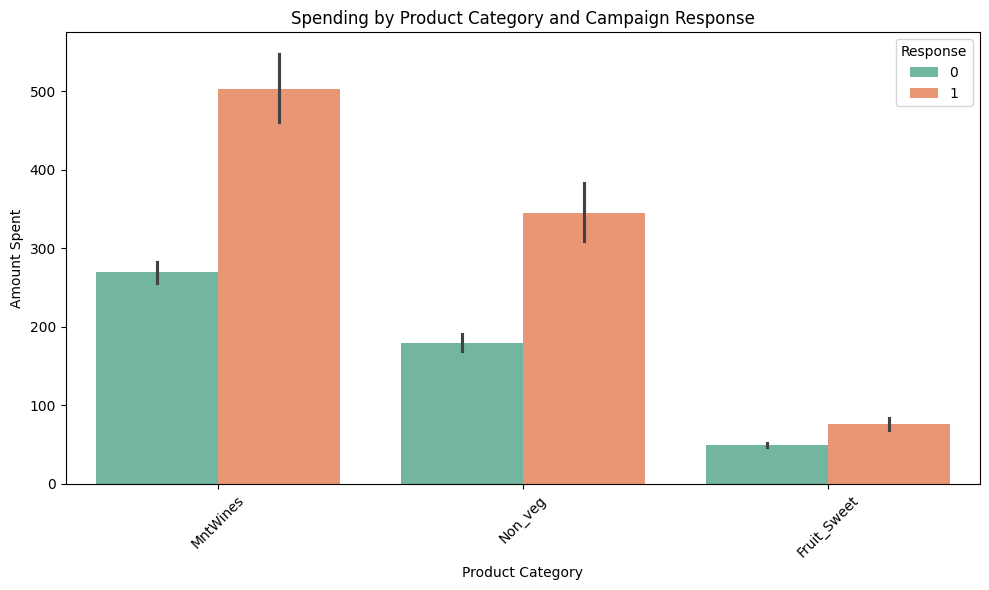

In [ ]:
spending_cols = ['MntWines', 'Non_veg','Fruit_Sweet']
df_melted = df.melt(id_vars='Response', value_vars=spending_cols,
                    var_name='Product', value_name='Spending')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Spending', hue='Response', data=df_melted, palette='Set2')
plt.title('Spending by Product Category and Campaign Response')
plt.ylabel('Amount Spent')
plt.xlabel('Product Category')
plt.legend(title='Response')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Recency              2216 non-null   int64  
 4   MntWines             2216 non-null   int64  
 5   MntGoldProds         2216 non-null   int64  
 6   NumDealsPurchases    2216 non-null   int64  
 7   NumWebPurchases      2216 non-null   int64  
 8   NumCatalogPurchases  2216 non-null   int64  
 9   NumStorePurchases    2216 non-null   int64  
 10  NumWebVisitsMonth    2216 non-null   int64  
 11  Response             2216 non-null   int64  
 12  Complain             2216 non-null   int64  
 13  Age                  2216 non-null   int64  
 14  Family_Size          2216 non-null   int64  
 15  Non_veg              2216 non-null   int64 

### Box plot


In [ ]:
# outliers detctions
df['Income'].describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


<Axes: xlabel='Income'>

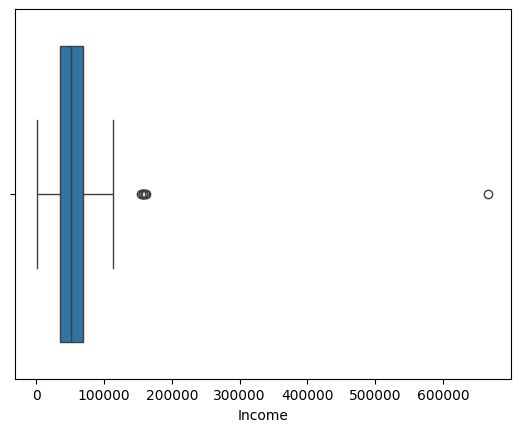

In [ ]:
sns.boxplot(x=df['Income'])


In [ ]:
df_fi = df[df['Income'] > 200000]
df_fi.head()

,Education,Marital_Status,Income,Recency,MntWines,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Family_Size,Non_veg,Fruit_Sweet
527,Graduation,Together,666666.0,23,9,12,4,3,1,3,6,0,0,48,1,26,15


In [ ]:
# REMOVE OUTLIER
df = df.drop(index= 527)

In [ ]:
#we will going to divide the income section into three part which is the small , medium and high earning individuals which can provide us more information on the subscroption part.

# 25% 35284.000000 50% 51373.000000 75% 68487.000000
percentiles = df['Income'].quantile([0.25,0.50,0.75])
percentiles


,Income
0.25,35284.0
0.50,51373.0
0.75,68487.0


In [ ]:
# Function for dividing the income
def income_cat(x):
    if x < percentiles[0.25]:
        return 'low wage earner'
    elif x < percentiles[0.50]:
        return 'medium wage earner'
    else:
        return 'high wage earner'


In [ ]:
df['wage_earner'] = df['Income'].apply(income_cat)

In [ ]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Family_Size,Non_veg,Fruit_Sweet,wage_earner
0,Graduation,Divorced,84835.0,0,189,218,1,4,4,6,1,1,0,55,0,490,293,high wage earner
1,Graduation,Single,57091.0,0,464,37,1,7,3,7,5,1,0,64,0,71,5,high wage earner
2,Graduation,Married,67267.0,0,134,30,1,3,2,5,2,0,0,67,1,74,13,high wage earner
3,Graduation,Together,32474.0,0,10,0,1,1,0,2,7,0,0,58,2,1,0,low wage earner
4,Graduation,Single,21474.0,0,6,34,2,3,1,2,7,1,0,36,1,35,16,low wage earner


### Gaussian

In [ ]:
'''# Income
# identifying skewness of data
import seaborn as sns
import matplotlib.pyplot as plt

# Income distribution
sns.displot(data=df, x='Income', bins=30, kde=True, height=5, aspect=1.5, color='blue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()'''


"# Income\n# identifying skewness of data\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Income distribution\nsns.displot(data=df, x='Income', bins=30, kde=True, height=5, aspect=1.5, color='blue')\nplt.title('Income Distribution')\nplt.xlabel('Income')\nplt.ylabel('Density')\nplt.show()"

In [ ]:
#print(df['Income'].skew()) #approx symmetric

In [ ]:
'''from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df['Income_transformed'] = pt.fit_transform(df[['Income']])

# Compare before and after
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Income'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Original Income Distribution')

sns.histplot(df['Income_transformed'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Transformed (Yeo-Johnson)')
print(df['Income_transformed'].skew())'''

"from sklearn.preprocessing import PowerTransformer\n\npt = PowerTransformer(method='yeo-johnson')\ndf['Income_transformed'] = pt.fit_transform(df[['Income']])\n\n# Compare before and after\nfig, axes = plt.subplots(1, 2, figsize=(12, 5))\nsns.histplot(df['Income'], kde=True, ax=axes[0], color='skyblue')\naxes[0].set_title('Original Income Distribution')\n\nsns.histplot(df['Income_transformed'], kde=True, ax=axes[1], color='salmon')\naxes[1].set_title('Transformed (Yeo-Johnson)')\nprint(df['Income_transformed'].skew())"

### Capture behavior and **relationships**

In [ ]:
# total_spent: sum of Mnt*
df['total_spent'] = df['MntWines'] + df['Non_veg'] + df['Fruit_Sweet'] + df['MntGoldProds']

In [ ]:
# Online Engagement: Sum of web purchases and visits
df['Online_Engagement'] = df['NumWebPurchases'] + df['NumWebVisitsMonth']

# Offline Engagement: Sum of store and catalog purchases
df['Offline_Engagement'] = df['NumStorePurchases'] + df['NumCatalogPurchases']

# Discount Rate: Deals per store purchase (with smoothing to avoid division by zero)
df['Discount_Rate'] = df['NumDealsPurchases'] / (df['NumStorePurchases'] + 1)


In [ ]:
df.drop(  ['NumStorePurchases', 'NumCatalogPurchases', 'NumDealsPurchases','NumWebPurchases','NumWebVisitsMonth'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Education           2215 non-null   object 
 1   Marital_Status      2215 non-null   object 
 2   Income              2215 non-null   float64
 3   Recency             2215 non-null   int64  
 4   MntWines            2215 non-null   int64  
 5   MntGoldProds        2215 non-null   int64  
 6   Response            2215 non-null   int64  
 7   Complain            2215 non-null   int64  
 8   Age                 2215 non-null   int64  
 9   Family_Size         2215 non-null   int64  
 10  Non_veg             2215 non-null   int64  
 11  Fruit_Sweet         2215 non-null   int64  
 12  wage_earner         2215 non-null   object 
 13  total_spent         2215 non-null   int64  
 14  Online_Engagement   2215 non-null   int64  
 15  Offline_Engagement  2215 non-null   int64  
 16  Discount_Ra

### Binning and Seg


In [ ]:
# Age Bins: Youth, Adult, Senior
df['Age']=pd.cut(df['Age'], bins=[0, 30, 60, 100], labels=['Youth', 'Adult', 'Senior'])

In [ ]:
df.sample(5)

,Education,Marital_Status,Income,Recency,MntWines,MntGoldProds,Response,Complain,Age,Family_Size,Non_veg,Fruit_Sweet,wage_earner,total_spent,Online_Engagement,Offline_Engagement,Discount_Rate
1551,Graduation,Single,70596.0,68,347,26,0,0,Adult,0,551,44,high wage earner,968,5,17,0.076923
680,PhD,Together,57906.0,29,243,15,0,0,Adult,1,129,14,high wage earner,401,8,10,0.333333
1205,PhD,Single,42767.0,53,20,38,0,0,Adult,2,62,11,medium wage earner,131,11,3,0.333333
2153,Graduation,Divorced,51983.0,95,631,30,0,0,Senior,1,125,7,high wage earner,793,16,12,0.272727
1358,2n Cycle,Single,38741.0,60,7,13,0,0,Senior,2,25,16,medium wage earner,61,9,3,0.500000


## Encoding

In [ ]:
df.sample(5)

,Education,Marital_Status,Income,Recency,MntWines,MntGoldProds,Response,Complain,Age,Family_Size,Non_veg,Fruit_Sweet,wage_earner,total_spent,Online_Engagement,Offline_Engagement,Discount_Rate
1794,Basic,Married,28249.0,80,1,10,0,0,Senior,0,9,23,low wage earner,43,8,3,0.250000
1745,Graduation,Married,18690.0,77,6,19,0,0,Senior,0,30,5,low wage earner,60,9,3,0.333333
390,Graduation,Married,24645.0,16,5,0,0,0,Adult,1,8,4,low wage earner,17,9,2,0.333333
808,Graduation,Together,28359.0,35,6,2,0,0,Adult,1,7,1,low wage earner,16,8,2,0.333333
1334,Graduation,Married,73691.0,58,707,73,0,0,Adult,1,335,64,high wage earner,1179,8,10,0.222222


In [ ]:
df_encoded = pd.get_dummies(df, dtype= int, drop_first=False)

In [ ]:
df_encoded.drop('Income', axis=1, inplace=True)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Recency                         2215 non-null   int64  
 1   MntWines                        2215 non-null   int64  
 2   MntGoldProds                    2215 non-null   int64  
 3   Response                        2215 non-null   int64  
 4   Complain                        2215 non-null   int64  
 5   Family_Size                     2215 non-null   int64  
 6   Non_veg                         2215 non-null   int64  
 7   Fruit_Sweet                     2215 non-null   int64  
 8   total_spent                     2215 non-null   int64  
 9   Online_Engagement               2215 non-null   int64  
 10  Offline_Engagement              2215 non-null   int64  
 11  Discount_Rate                   2215 non-null   float64
 12  Education_2n Cycle              2215 no

In [ ]:
# full correlation table
df_encoded.corr().style.background_gradient(cmap='viridis')

,Recency,MntWines,MntGoldProds,Response,Complain,Family_Size,Non_veg,Fruit_Sweet,total_spent,Online_Engagement,Offline_Engagement,Discount_Rate,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age_Youth,Age_Adult,Age_Senior,wage_earner_high wage earner,wage_earner_low wage earner,wage_earner_medium wage earner
Recency,1.000000,0.015370,0.017417,-0.199981,0.013599,0.018322,0.019297,0.010928,0.019706,-0.017012,0.012496,0.014046,-0.005599,-0.003167,0.030599,-0.026190,-0.008464,0.004129,-0.023782,0.005468,-0.019597,0.003146,0.020638,-0.001444,-0.047804,0.005511,-0.019646,0.018698,0.003743,-0.017847,0.013533
MntWines,0.015370,1.000000,0.392588,0.246185,-0.039516,-0.353782,0.575261,0.438366,0.893098,0.206681,0.731398,-0.155759,-0.097503,-0.139665,-0.059500,0.036554,0.159279,0.004481,-0.013164,0.019897,-0.012648,-0.021409,0.006475,0.034599,0.001495,-0.016994,-0.159015,0.161874,0.687708,-0.485751,-0.308411
MntGoldProds,0.017417,0.392588,1.000000,0.140232,-0.031163,-0.268922,0.400533,0.424806,0.528599,0.144416,0.475372,-0.089857,0.017636,-0.064518,0.130947,-0.032498,-0.117679,0.092849,-0.012069,0.015244,-0.017383,-0.006760,-0.008250,0.043205,-0.001149,-0.015348,-0.076612,0.076469,0.416613,-0.302406,-0.178692
Response,-0.199981,0.246185,0.140232,1.000000,-0.002048,-0.167642,0.228122,0.134440,0.264015,0.114887,0.141298,-0.008902,-0.035558,-0.050113,-0.039482,0.003835,0.087888,0.029411,0.018856,0.054128,-0.079987,0.108639,-0.075023,0.045622,0.029411,0.021327,0.009422,-0.010767,0.099602,-0.073758,-0.041260
Complain,0.013599,-0.039516,-0.031163,-0.002048,1.000000,0.031777,-0.025056,-0.015952,-0.037475,0.000660,-0.021597,0.002997,0.034198,-0.015465,0.031950,-0.018341,-0.040228,-0.002941,-0.003603,-0.003036,-0.001196,0.017472,-0.004503,-0.018441,-0.002941,0.077495,-0.044705,0.026210,-0.032656,-0.002715,0.040441
Family_Size,0.018322,-0.353782,-0.268922,-0.167642,0.031777,1.000000,-0.526193,-0.442890,-0.500308,0.168580,-0.436268,0.214433,-0.026152,-0.047473,-0.019412,0.026449,0.035678,-0.038014,0.035373,0.026088,0.018894,-0.062044,0.025083,-0.016508,0.002120,-0.071197,0.010963,-0.001545,-0.324829,0.072734,0.302472
Non_veg,0.019297,0.575261,0.400533,0.228122,-0.025056,-0.526193,1.000000,0.667622,0.866290,-0.128596,0.717633,-0.056236,-0.026210,-0.107316,0.074757,-0.017627,-0.016433,0.036284,-0.024221,-0.025649,-0.025559,0.037856,0.002521,0.022166,-0.017456,0.014503,-0.068058,0.066264,0.609374,-0.385772,-0.317958
Fruit_Sweet,0.010928,0.438366,0.424806,0.134440,-0.015952,-0.442890,0.667622,1.000000,0.688183,-0.046781,0.612030,-0.171486,0.046952,-0.066555,0.123416,-0.069517,-0.094853,0.025833,-0.021785,0.004025,-0.011105,0.006750,-0.013212,0.042954,-0.019880,0.004060,-0.042019,0.040901,0.546562,-0.334703,-0.296497
total_spent,0.019706,0.893098,0.528599,0.264015,-0.037475,-0.500308,0.866290,0.688183,1.000000,0.067117,0.831884,-0.139481,-0.058742,-0.137815,0.024831,0.001802,0.060648,0.029184,-0.021423,0.001877,-0.020898,0.004544,0.002429,0.037725,-0.009143,-0.004100,-0.129859,0.130541,0.747985,-0.503694,-0.360092
Online_Engagement,-0.017012,0.206681,0.144416,0.114887,0.000660,0.168580,-0.128596,-0.046781,0.067117,1.000000,0.030630,0.144432,-0.015861,-0.028606,-0.001022,-0.020357,0.041281,-0.037135,0.019921,0.037690,0.008145,-0.039771,-0.003871,0.007830,0.047176,-0.028946,0.014659,-0.008313,0.008052,-0.063764,0.054501


## train test split

In [ ]:
x=df_encoded.drop('Response',axis=1)
y=df_encoded['Response']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Address class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_res,y_res = smote.fit_resample(X_train, y_train)


# Model Training

In [ ]:
# Step 1: Define a function for model training and evaluation
'''def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Print metrics
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("AUC Score:", auc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return accuracy, f1, auc'''

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test, threshold, verbose=True, shap_analysis=False):
    # Train the model
    model.fit(X_train, y_train)
    thresholds = np.arange(0.3, 0.6, 0.05)
    # Predict probabilities and apply threshold
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    if verbose:
        print(f" Threshold: {threshold}")
        print(" Accuracy:", round(accuracy, 4))
        print(" F1 Score:", round(f1, 4))
        print(" AUC Score:", round(auc, 4))
        print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print(" Classification Report:\n", classification_report(y_test, y_pred))



## Adaboost

In [ ]:
# Step 1: Use GridSearchCV for hyperparameter tuning
grid=dict()
grid['n_estimators'] = [10,50,80,100]
grid['learning_rate'] = [0.0001,0.001,0.01,0.1,1.0]
grid_search = GridSearchCV(AdaBoostClassifier(), param_grid=grid, scoring='accuracy', n_jobs=-1, cv=10)
#grid_result = grid_search.fit(df_encoded.drop('Response', axis=1), df_encoded['Response']) # Use df_encoded as it contains the encoded data
grid_result = grid_search.fit(x_res,y_res)

In [ ]:
best_params = grid_result.best_params_
print("best %f using %s"% (grid_result.best_score_, grid_result.best_params_))

best 0.867240 using {'learning_rate': 1.0, 'n_estimators': 100}


In [ ]:
# step 2: Model training
abc = AdaBoostClassifier(learning_rate=best_params['learning_rate'], n_estimators=best_params['n_estimators'])
evaluate_model(abc, x_res, X_test, y_res, y_test)

Accuracy: 0.835214446952596
F1 Score: 0.48951048951048953
AUC Score: 0.8406641604010024
Confusion Matrix:
 [[335  45]
 [ 28  35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       380
           1       0.44      0.56      0.49        63

    accuracy                           0.84       443
   macro avg       0.68      0.72      0.70       443
weighted avg       0.85      0.84      0.84       443



(0.835214446952596, 0.48951048951048953, np.float64(0.8406641604010024))

##  Gradient Boosting

In [ ]:
# Step 1: Use GridSearchCV for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, scoring='f1_macro', cv=5, n_jobs=-1)
grid_search.fit(x_res, y_res)

print("Best Params:", grid_search.best_params_)

Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [ ]:
gbc = GradientBoostingClassifier(learning_rate=best_params['learning_rate'], n_estimators=best_params['n_estimators'])
evaluate_model(gbc, x_res, X_test,.55, y_res, y_test)

NameError: name 'GradientBoostingClassifier' is not defined

In [ ]:
thresholds = np.arange(0.3, 0.6, 0.05)
for t in thresholds:
    print(f"\nThreshold: {t}")
    evaluate_model(gbc, X_train, X_test, y_train, y_test, threshold=t, verbose=True, shap_analysis=False)



Threshold: 0.3
 Threshold: 0.3
 Accuracy: 0.8375
 F1 Score: 0.5068
 AUC Score: 0.8476
 Confusion Matrix:
 [[334  46]
 [ 26  37]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       380
           1       0.45      0.59      0.51        63

    accuracy                           0.84       443
   macro avg       0.69      0.73      0.70       443
weighted avg       0.86      0.84      0.85       443


Threshold: 0.35
 Threshold: 0.35
 Accuracy: 0.8375
 F1 Score: 0.5
 AUC Score: 0.8476
 Confusion Matrix:
 [[335  45]
 [ 27  36]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       380
           1       0.44      0.57      0.50        63

    accuracy                           0.84       443
   macro avg       0.68      0.73      0.70       443
weighted avg       0.86      0.84      0.85       443


Threshold: 0.39999999999999997
 Thre